<a href="https://colab.research.google.com/github/DaniilSysoev/opisis_sem_4/blob/main/%D0%9E%D0%BF%D0%B8%D1%81%D0%B8%D1%81_%D1%81%D0%B5%D0%BC_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Фильтрация сигналов. Понятие идеального фильтра. Реализация с использованием преобразования Фурье.</h1>

<h2>Задание: При помощи модели фильтра, построенной на основе прямого и обратного преобразования Фурье, получить сигналы и их спектры после прохождения сигнала через ФНЧ, ПФ и ФВЧ с выделением по одной гармонической составляющей исходного сигнала.</h2>

<h3>Введем необходимые для рассчетов библиотеки</h3>

In [16]:
import numpy as np
from math import *
import matplotlib.pyplot as plt

<h3>Добавим функцию построения сигнала</h3>

In [2]:
def signal(x):
    return 1 + np.sin(2.0*pi*x) + 2.0 * np.cos(4.0*pi*x) + 0.5 * np.cos(6.0*pi*x)

<h3>Добавим функцию фильтра</h3>

In [3]:
def filter(time, signal, fl, fh):
    n = len(signal)
    freq = np.fft.fftfreq(n, time[1]-time[0])
    spectr = np.fft.fft(signal)
    for i in range(n):
        if not fl <= abs(freq[i]) <= fh:
            spectr[i] *= 0+0j
    return np.fft.ifft(spectr)

<h3>Введем необходимые переменные, для вычисления сигнала</h3>

<h4>Входыне данные</h4>
<h5>Частота 1-ой гармоники сигнала: 10<br>Временной интервал: 5<br>Число временных отсчетов: 1000000</h5>

In [4]:
f = float(input('Частота 1-ой гармоники сигнала '))
T = float(input('Временной интервал '))
n = int(input('Число временных отсчетов '))

Частота 1-ой гармоники сигнала 10
Временной интервал 5
Число временных отсчетов 1000000


<h3>Построим временную шкалу и сигнал по ней</h3>

In [6]:
t = np.linspace(0, T, n)
u = signal(f*t)

<h3>Произведем рассчет БПФ и введем частотную шкалу</h3>

In [7]:
spec = np.fft.fft(u)
freq = np.fft.fftfreq(n, T/n)

<h3>Произведем рассчет для фильтра низких частот, полосного фильтра и фильтра высоких частот</h3>

In [8]:
print('Расчет ФНЧ...')
sig_lf = filter(t, u, 0.5*f, 1.5*f)
print('Расчет ПФ...')
sig_pb = filter(t, u, 1.5*f, 2.5*f)
print('Расчет ФВЧ...')
sig_hf = filter(t, u, 2.5*f, 4*f)

Расчет ФНЧ...
Расчет ПФ...
Расчет ФВЧ...


<h3>Произведем рассчет БПФ для полученных сигналов, прошедших через фильтр</h3>

In [9]:
spec_lf = np.fft.fft(sig_lf)
spec_pb = np.fft.fft(sig_pb)
spec_hf = np.fft.fft(sig_hf)

<h3>Построим модель исходного сигнала</h3>

(0.0, 0.1)

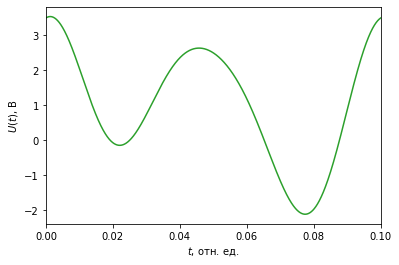

In [15]:
fig, ax = plt.subplots()
ax.plot(t, u, color='tab:green')
ax.set_xlabel("$t$, отн. ед.", fontsize=10)
ax.set_ylabel("$U(t)$, В", fontsize=10)
ax.set_xlim(0, 1/f)

<h3>Построим спектр заданного сигнала</h3>

(-1.0, 40.0)

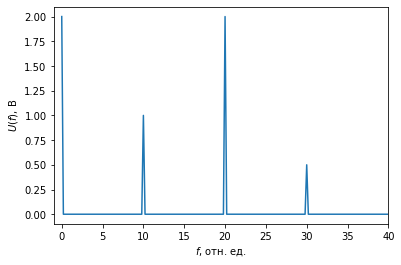

In [17]:
fig, ax = plt.subplots()
ax.plot(freq[0:n//2], (np.hypot(spec.real, spec.imag)/n*2.0)[0:n//2])
ax.set_xlabel("$f$, отн. ед.", fontsize=10)
ax.set_ylabel("$U(f)$, В", fontsize=10)
ax.set_xlim(-0.1*f, 4*f)

<h3>Построим модели сигнала, прошедшего через каждый фильтр</h3>

<h4>Фильтр низких частот</h4>

(0.0, 0.1)

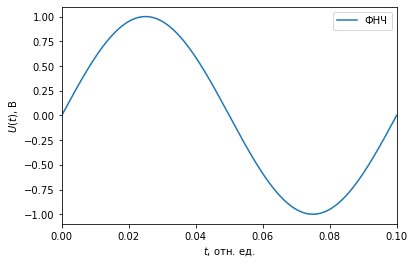

In [20]:
fig, ax = plt.subplots()
ax.plot(t, sig_lf.real, label='ФНЧ')
ax.set_xlabel("$t$, отн. ед.", fontsize=10)
ax.set_ylabel("$U(t)$, В", fontsize=10)
ax.legend(loc='best')
ax.set_xlim(0, 1/f)

<h4>Полосный фильтр</h4>

(0.0, 0.1)

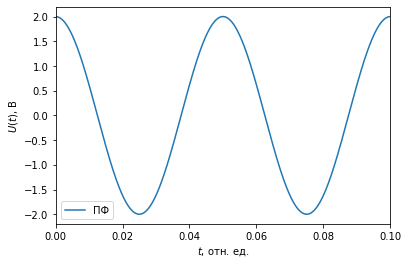

In [22]:
fig, ax = plt.subplots()
ax.plot(t, sig_pb.real, label='ПФ')
ax.set_xlabel("$t$, отн. ед.", fontsize=10)
ax.set_ylabel("$U(t)$, В", fontsize=10)
ax.legend(loc='best')
ax.set_xlim(0, 1/f)


<h4>Фильтр высоких частот</h4>

(0.0, 0.1)

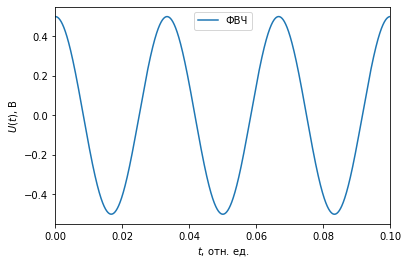

In [23]:
fig, ax = plt.subplots()
ax.plot(t, sig_hf.real, label='ФВЧ')
ax.set_xlabel("$t$, отн. ед.", fontsize=10)
ax.set_ylabel("$U(t)$, В", fontsize=10)
ax.legend(loc='best')
ax.set_xlim(0, 1/f)


<h3>Как мы видим, пройдя через каждый фильтр у нас осталась соответствующая частотная составляющая. Поэтому сигнал имеет вид синусоиды с определенной частотой, которую фильтр пропустил</h3>

<h3>Построим спектры для каждого фильтра</h3>

<h4>Фильтр низких частот</h4>

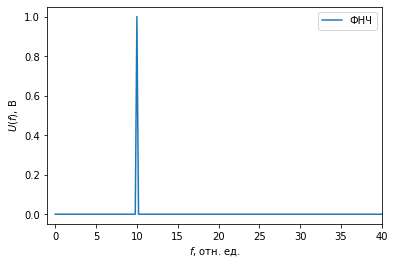

In [26]:
fig, ax = plt.subplots()
ax.plot(freq[0:n//2], (np.hypot(spec_lf.real, spec_lf.imag)/n*2.0)[0:n//2], label='ФНЧ')
ax.set_xlabel("$f$, отн. ед.", fontsize=10)
ax.set_ylabel("$U(f)$, В", fontsize=10)
ax.set_xlim(-0.1*f, 4*f)
ax.legend(loc='best')

<h4>Полосный фильтр</h4>

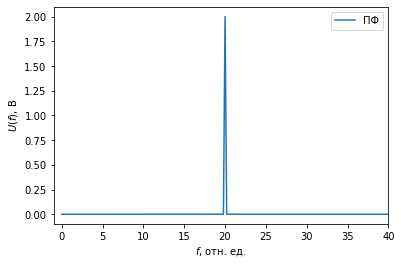

In [27]:
fig, ax = plt.subplots()
ax.plot(freq[0:n//2], (np.hypot(spec_pb.real, spec_pb.imag)/n*2.0)[0:n//2], label='ПФ')
ax.set_xlabel("$f$, отн. ед.", fontsize=10)
ax.set_ylabel("$U(f)$, В", fontsize=10)
ax.set_xlim(-0.1*f, 4*f)
ax.legend(loc='best')

<h4>Фильтр высоких частот</h4>

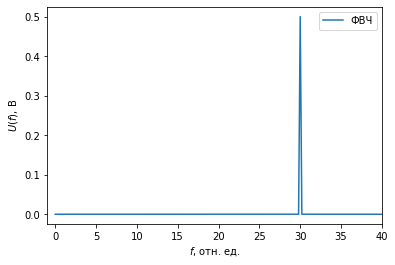

In [28]:
fig, ax = plt.subplots()
ax.plot(freq[0:n//2], (np.hypot(spec_hf.real, spec_hf.imag)/n*2.0)[0:n//2], label='ФВЧ')
ax.set_xlabel("$f$, отн. ед.", fontsize=10)
ax.set_ylabel("$U(f)$, В", fontsize=10)
ax.set_xlim(-0.1*f, 4*f)
ax.legend(loc='best')